In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

In [3]:
import re

In [4]:
data=pd.read_csv(r"C:\Users\Nithaj\Desktop\golorry\placement_table.csv")


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   placement_id    3000 non-null   int64 
 1   placement_ts    3000 non-null   object
 2   truck_plate     3000 non-null   object
 3   truck_capacity  3000 non-null   int64 
 4   driver_id       3000 non-null   int64 
 5   driver_phone    3000 non-null   int64 
 6   goods_weight    3000 non-null   int64 
 7   shipping_fee    3000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 187.6+ KB


In [5]:
data.head(-1)


,placement_id,placement_ts,truck_plate,truck_capacity,driver_id,driver_phone,goods_weight,shipping_fee
0,0,2018-01-01 17:55:15+05:30,TNE3ZJQPRH,10,257,5701819972,27,40411
1,1,2018-01-02 02:48:15+05:30,APBOXM6CYR,21,243,8160025431,20,81731
2,2,2018-01-02 08:07:15+05:30,JHFO87NR8U,21,105,5737886603,17,13562
3,3,2018-01-02 22:33:15+05:30,TN0MUM266Q,25,208,6527430949,18,90496
4,4,2018-01-03 07:51:15+05:30,JH92ZSVZ9I,17,25,5182354054,30,74317
...,...,...,...,...,...,...,...,...
2994,2994,2020-11-14 23:55:15+05:30,TNP6985EL2,30,171,9387573188,23,24344
2995,2995,2020-11-15 12:52:15+05:30,GJA7JM07N3,21,22,7624035059,26,45733
2996,2996,2020-11-15 19:21:15+05:30,TSJHOVFXPD,30,68,7636419588,17,77554
2997,2997,2020-11-15 20:48:15+05:30,JHHLKTV3KB,25,54,7005938676,25,31696


In [6]:
dict2=data['placement_ts'][1][0:7]
dict2


'2018-01'

In [7]:
dict1={}

for row in range(0, len(data)): 
    list1=data['placement_ts'][row][0:7]
    if list1 in dict1:
        dict1[list1]=dict1[list1]+1
    else:
        dict1[list1]=1
        
      
# show the Dataframe 
dict1

{'2018-01': 91,
 '2018-02': 74,
 '2018-03': 84,
 '2018-04': 91,
 '2018-05': 85,
 '2018-06': 77,
 '2018-07': 81,
 '2018-08': 90,
 '2018-09': 85,
 '2018-10': 91,
 '2018-11': 90,
 '2018-12': 86,
 '2019-01': 99,
 '2019-02': 77,
 '2019-03': 85,
 '2019-04': 82,
 '2019-05': 88,
 '2019-06': 96,
 '2019-07': 91,
 '2019-08': 90,
 '2019-09': 78,
 '2019-10': 92,
 '2019-11': 88,
 '2019-12': 95,
 '2020-01': 85,
 '2020-02': 82,
 '2020-03': 91,
 '2020-04': 97,
 '2020-05': 80,
 '2020-06': 85,
 '2020-07': 92,
 '2020-08': 85,
 '2020-09': 91,
 '2020-10': 80,
 '2020-11': 46}

<BarContainer object of 35 artists>

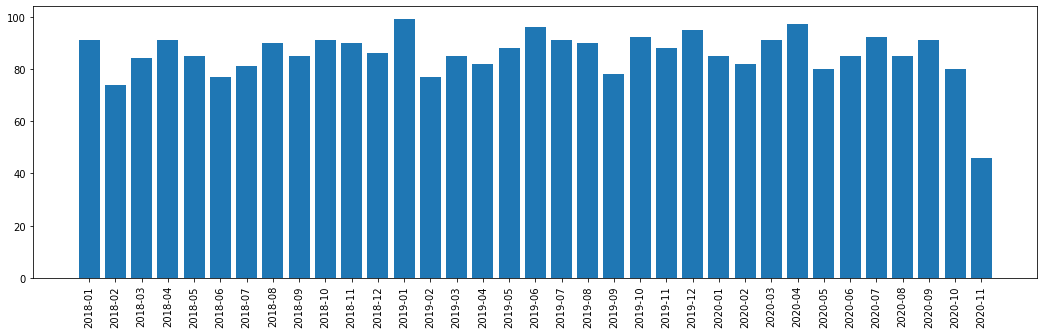

In [8]:
y=dict1.values()
x=dict1.keys()
f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
plt.bar(x,y)

2. What is the statistical distribution of the number of placements received per truck in 2020?

    For that i made a dictionary containing key,value as driver id and number of times time specific id occurs in the table 

In [9]:
dict3={}

for row in range(0, len(data)): 
    dr_id=data['driver_id'][row]
    if dr_id in dict3:
        dict3[dr_id]=dict3[dr_id]+1
    else:
        dict3[dr_id]=1
            
dict4=sorted(dict3.items())
dict4


[(0, 3),
 (1, 12),
 (2, 5),
 (3, 5),
 (4, 6),
 (5, 7),
 (6, 5),
 (7, 6),
 (8, 11),
 (9, 8),
 (10, 5),
 .......
 (473, 7),
 (474, 6),
 (475, 6),
 (476, 13),
 (477, 8),
 (478, 6),
 (479, 7),
 (480, 3),
 (481, 11),
 (482, 9),
 (483, 6),
 (484, 10),
 (485, 3),
 (486, 9),
 (487, 6),
 (488, 7),
 (489, 6),
 (490, 4),
 (491, 6),
 (492, 6),
 (493, 4),
 (494, 7),
 (495, 4),
 (496, 8),
 (497, 8),
 (498, 11),
 (499, 7)]

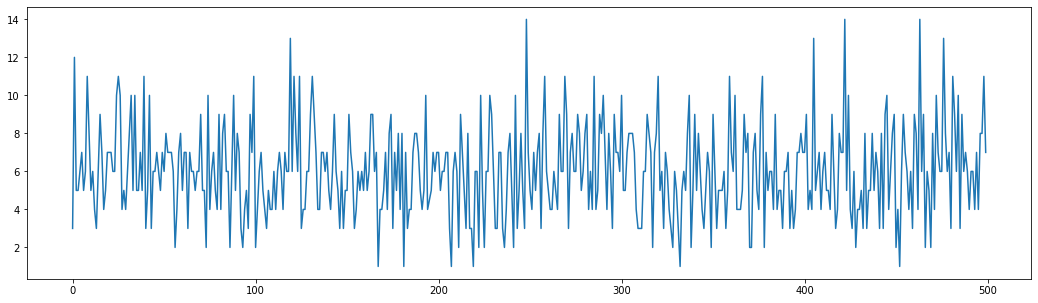

In [10]:

f, ax = plt.subplots(figsize=(18,5))

lists = sorted(dict3.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

3. How many placements are not fulfilled (never entered “in_transit” or “delivered” status) as of 2020-11-15?

In [11]:
data2=pd.read_csv(r"C:\Users\Nithaj\Desktop\golorry\status_table.csv")
data2.head(-1)

,status_ts,placement_id,status,revenue
0,2018-01-01 10:54:15+05:30,1264,in_transit,0
1,2018-01-01 12:57:15+05:30,1428,in_transit,0
2,2018-01-01 13:22:15+05:30,1782,in_transit,0
3,2018-01-01 18:17:15+05:30,2294,in_transit,0
4,2018-01-01 23:51:15+05:30,1482,in_transit,0
...,...,...,...,...
5974,2021-06-06 21:50:15+05:30,1723,delivered,138923
5975,2021-06-06 23:09:15+05:30,2354,delivered,76838
5976,2021-06-07 02:40:15+05:30,2997,delivered,100792
5977,2021-06-07 06:26:15+05:30,1653,delivered,109800


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   status_ts     5980 non-null   object
 1   placement_id  5980 non-null   int64 
 2   status        5980 non-null   object
 3   revenue       5980 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 187.0+ KB


In [13]:
data2['status']

0       in_transit
1       in_transit
2       in_transit
3       in_transit
4       in_transit
           ...    
5975     delivered
5976     delivered
5977     delivered
5978     delivered
5979     delivered
Name: status, Length: 5980, dtype: object

In [14]:
dict5={}

for row in range(0, len(data2)): 
    dr_id=data2['status'][row]
    if dr_id in dict5:
        dict5[dr_id]=dict5[dr_id]+1
    else:
        dict5[dr_id]=1
        
dict5

{'in_transit': 2990, 'delivered': 2990}

There is no entry that is not fulfilled. So ZERO

4. What’s the company’s monthly profit margin since 2018-01-01?

In [15]:
shipping=0
tot_revenue=0


for num in range(0,len(data)):
    shipping=shipping+data['shipping_fee'][num]
for num in range(0,len(data2)):
    tot_revenue=tot_revenue+data2['revenue'][num]

print("profit margin = {0}%".format((tot_revenue-shipping)/tot_revenue*100))

profit margin = 43.68354933762376%


5. The dataset is randomly generated. Do you see any data hygiene problems with it?
        'status_ts' colomn cointains date, time and Indian Standard time(+5:30). Here IST is not needed because all the given data is from India only. Also seperating date and time into seperate coloms would be better. Other than that everything is properly labelled. There is no missing values. 

6. What other insights can you get out of these two tables? Propose the analysis and run one of them that you find most interesting.
        The time taken for each delivery is not given. Most placements happens during the month of january according to the given data. From the placement table it can be seen that some of the drivers had more deliveries than others.

In [26]:
#checking frequency for a random driver_id
for row in range(0, len(data)): 
    if data2['placement_id'][row]==25:
        print(data.loc[[row]])


     placement_id               placement_ts truck_plate  truck_capacity  \
282           282  2018-04-13 00:06:15+05:30  GJY9THLUC1              21   

     driver_id  driver_phone  goods_weight  shipping_fee  
282        493    7957006188            22         67351  
      placement_id               placement_ts truck_plate  truck_capacity  \
1616          1616  2019-07-22 13:47:15+05:30  WB3KFV6JLY              10   

      driver_id  driver_phone  goods_weight  shipping_fee  
1616         50    9294534423            24         64255  


In [28]:
dict6={}

for row in range(0, len(data)): 
    dr_id=data['driver_id'][row]
    if dr_id in dict6:
        dict6[dr_id]=dict6[dr_id]+1
    else:
        dict6[dr_id]=1
        
dict6

{257: 8,
 243: 3,
 105: 4,
 208: 6,
 25: 11,
 116: 7,
 446: 4,
 185: 4,
 486: 9,
 164: 9,
 212: 9,
 49: 7,
 1: 12,
 240: 5,
 482: 9,
 188: 8,
 444: 9,
 480: 3,
 281: 9,
 236: 2,
 24: 10,
 88: 10,
 10: 5,
 421: 7,
 133: 7,
 337: 10,
 347: 7,
 38: 5,
 161: 5,
 468: 5,
 454: 9,
 11: 6,
 404: 4,
 496: 8,
 122: 8,
 300: 10,
 103: 7,
 455: 7,
 262: 4,
 302: 5,
 414: 4,
 325: 6,
 123: 6,
 3: 5,
 320: 11,
 341: 5,
 298: 7,
 193: 10,
 248: 14,
 131: 11,
 355: 5,
 61: 7,
 422: 14,
 228: 10,
 97: 9,
 301: 5,
 242: 10,
 365: 4,
 467: 6,
 42: 10,
 47: 6,
 57: 4,
 424: 10,
 22: 6,
 142: 6,
 420: 7,
 290: 10,
 423: 5,
 48: 5,
 139: 7,
 453: 6,
 367: 9,
 391: 7,
 33: 5,
 291: 7,
 152: 7,
 8: 11,
 203: 6,
 382: 6,
 128: 6,
 147: 6,
 58: 7,
 284: 4,
 56: 2,
 77: 7,
 303: 7,
 65: 6,
 233: 7,
 489: 6,
 399: 7,
 339: 5,
 162: 6,
 31: 8,
 296: 9,
 52: 7,
 376: 9,
 401: 9,
 479: 7,
 389: 6,
 353: 5,
 171: 7,
 135: 4,
 251: 4,
 225: 2,
 196: 5,
 318: 7,
 261: 4,
 333: 5,
 201: 5,
 305: 8,
 362: 10,
 285: 11,


<BarContainer object of 498 artists>

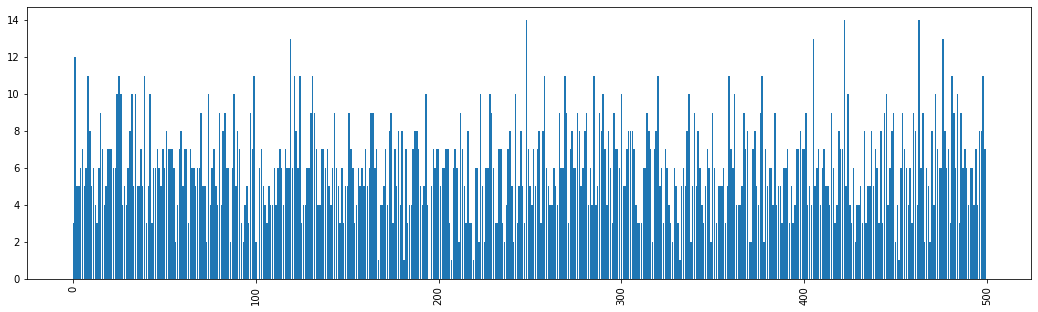

In [29]:
y=dict6.values()
x=dict6.keys()
f, ax = plt.subplots(figsize=(18,5))
plt.xticks(rotation=90)
plt.bar(x,y)

From this it is clear that there is high variation in the work load for each driver(this is assumed without considering the duration of each delivery)